In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [12]:
df = pd.read_csv("boston-housing.csv")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     333 non-null    float64
 1   ZN       333 non-null    float64
 2   INDUS    333 non-null    float64
 3   CHAS     333 non-null    int64  
 4   NOX      333 non-null    float64
 5   RM       333 non-null    float64
 6   AGE      333 non-null    float64
 7   DIS      333 non-null    float64
 8   RAD      333 non-null    int64  
 9   TAX      333 non-null    int64  
 10  PTRATIO  333 non-null    float64
 11  B        333 non-null    float64
 12  LSTAT    333 non-null    float64
 13  MEDV     333 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.6 KB


In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

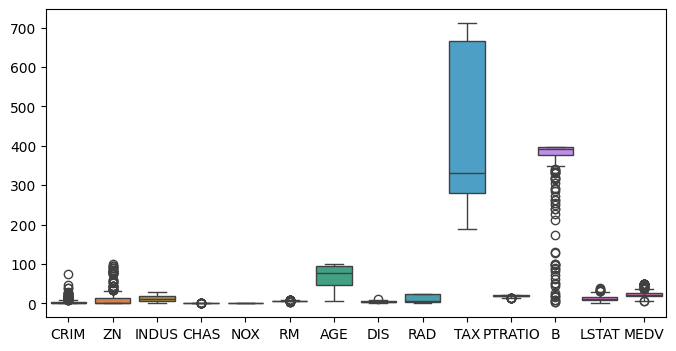

In [15]:
plt.figure(figsize=[8,4])
sns.boxplot(data=df)
plt.show()

In [17]:
df1 = df[(df['RM'] < 7)]
df = df1[(df1['RM']>5.2)]
df = df[(df['DIS'] < 9.2)]
df = df[(df['LSTAT'] < 29)]
df.shape[0] - df1.shape[0]

0

In [18]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,3.009236,8.778598,11.708708,0.055351,0.556394,6.175151,67.694465,3.760191,9.645756,412.542435,18.704059,358.130295,12.618303,20.836162
std,6.679654,20.093920,6.777017,0.229086,0.113996,0.384342,27.765989,1.891448,8.759755,168.787037,1.955340,89.681966,5.768493,6.198281
min,0.006320,0.000000,0.740000,0.000000,0.385000,5.272000,6.000000,1.129600,1.000000,188.000000,13.000000,3.500000,2.940000,5.600000
25%,0.087665,0.000000,5.860000,0.000000,0.453000,5.890000,45.250000,2.239350,4.000000,285.500000,17.500000,376.910000,8.165000,17.350000
50%,0.229270,0.000000,9.900000,0.000000,0.538000,6.151000,75.000000,3.132300,5.000000,337.000000,19.100000,392.300000,11.690000,20.600000
75%,3.623450,0.000000,18.100000,0.000000,0.624000,6.432000,93.350000,5.165650,24.000000,666.000000,20.200000,396.375000,16.385000,23.900000
max,73.534100,100.000000,27.740000,1.000000,0.871000,6.998000,100.000000,9.187600,24.000000,711.000000,21.200000,396.900000,27.800000,50.000000


<Axes: >

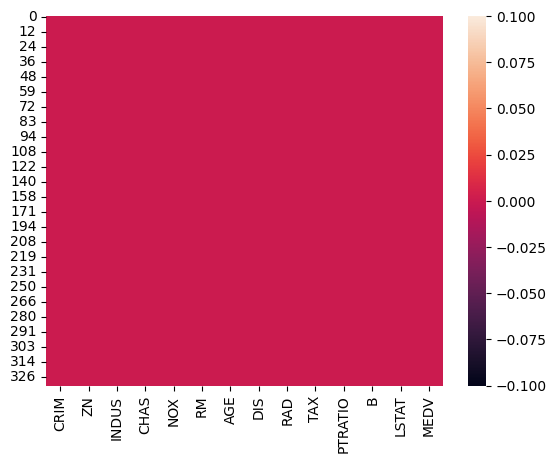

In [19]:
sns.heatmap(df.isnull())

<Axes: >

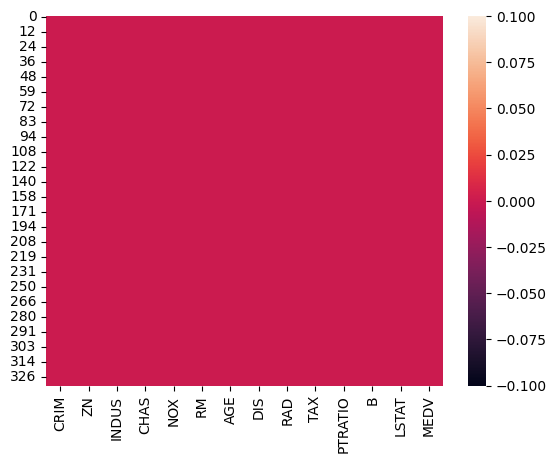

In [31]:
df['CRIM'] = df['CRIM'].fillna(value=df['CRIM'].mean())
df['ZN'] = df['ZN'].fillna(value=df['ZN'].mean())
df['INDUS'] = df['INDUS'].fillna(value=df['INDUS'].mean())
df['CHAS'] = df['CHAS'].fillna(value=df['CHAS'].mean())
df['AGE'] = df['AGE'].fillna(value=df['AGE'].mean())
df['LSTAT'] = df['LSTAT'].fillna(value=df['LSTAT'].mean())
sns.heatmap(df.isnull())

In [21]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

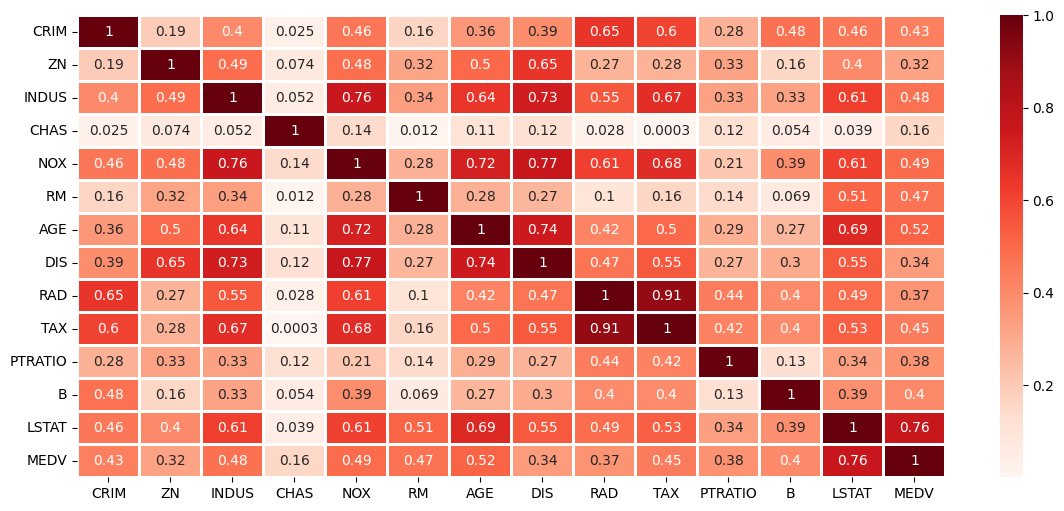

In [22]:
plt.figure(figsize=(14,6))
corr=abs(df.corr())
sns.heatmap(corr,annot=True,linewidth=1,cmap="Reds")
plt.show()

In [23]:
df.count()

CRIM       271
ZN         271
INDUS      271
CHAS       271
NOX        271
RM         271
AGE        271
DIS        271
RAD        271
TAX        271
PTRATIO    271
B          271
LSTAT      271
MEDV       271
dtype: int64

In [24]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [25]:
X = df.drop('MEDV', axis='columns')
y = df.MEDV


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

0.7354770634058649

In [28]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7354770634058649